In [321]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

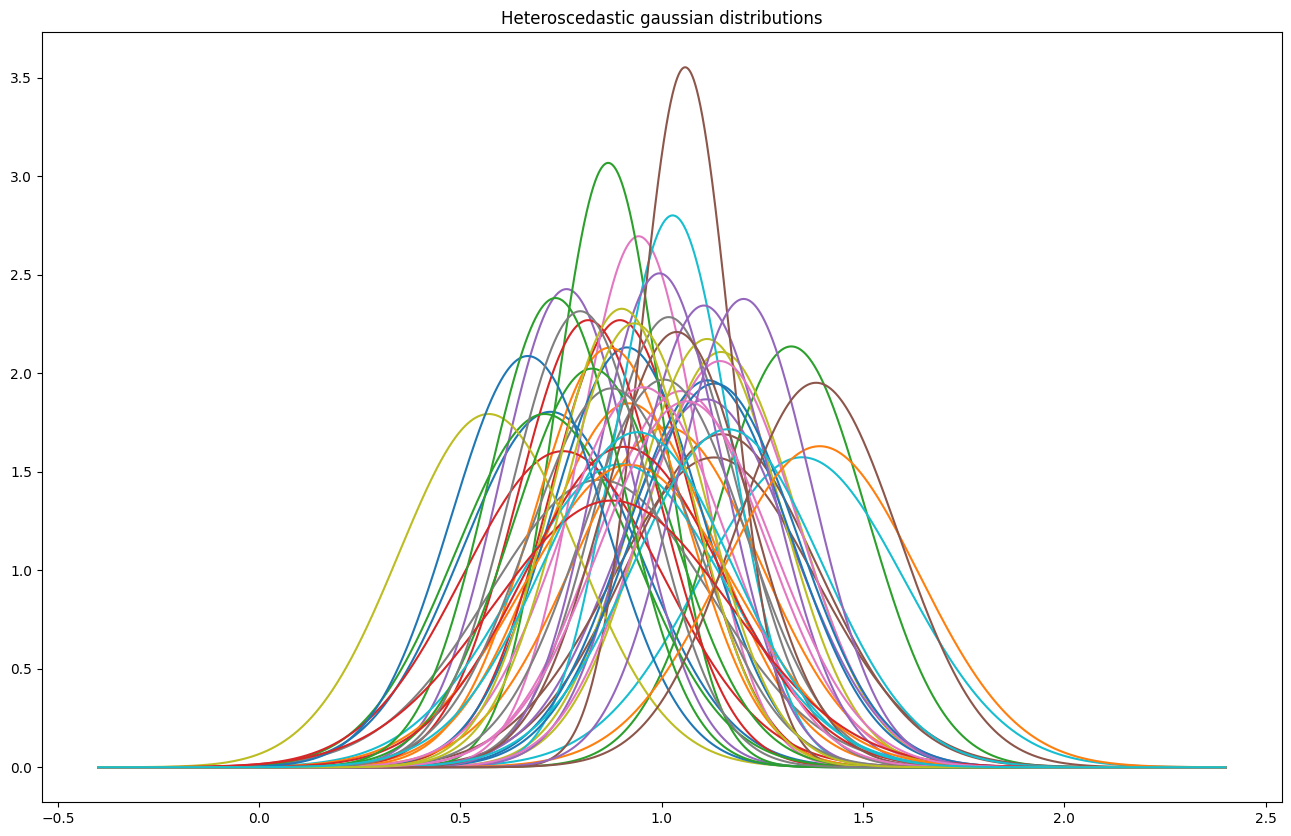

In [322]:
mu_obs = 1 
mu_sigma = 0.2
sigma_sigma = 0.05
N_obs = 50

# Generate a sample of observations from a given gaussian
sigmas = np.random.normal(mu_sigma, sigma_sigma, N_obs)
observations = np.array([np.random.normal(mu_obs, sigmas[i]) for i in range(N_obs)])

# Initialize the x axis to a reasonable interval centered at "mu"
nbins = 10000
left_lim = mu_obs - (7 * mu_sigma)
right_lim = mu_obs + (7 * mu_sigma)
x_grid = np.linspace(left_lim, right_lim, nbins)

# Generate a gaussian distribution centered at every observation with the same sigma
true_dist_estimations = np.array([stats.norm.pdf(x_grid, observations[i], sigmas[i]) for i in range(N_obs)])

# Plot each of them
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Heteroscedastic gaussian distributions")

for i in range(N_obs):
    ax.plot(x_grid, true_dist_estimations[i])

Mean: 0.978120871918604
Likelihhod maximum: 0.9780178017801784


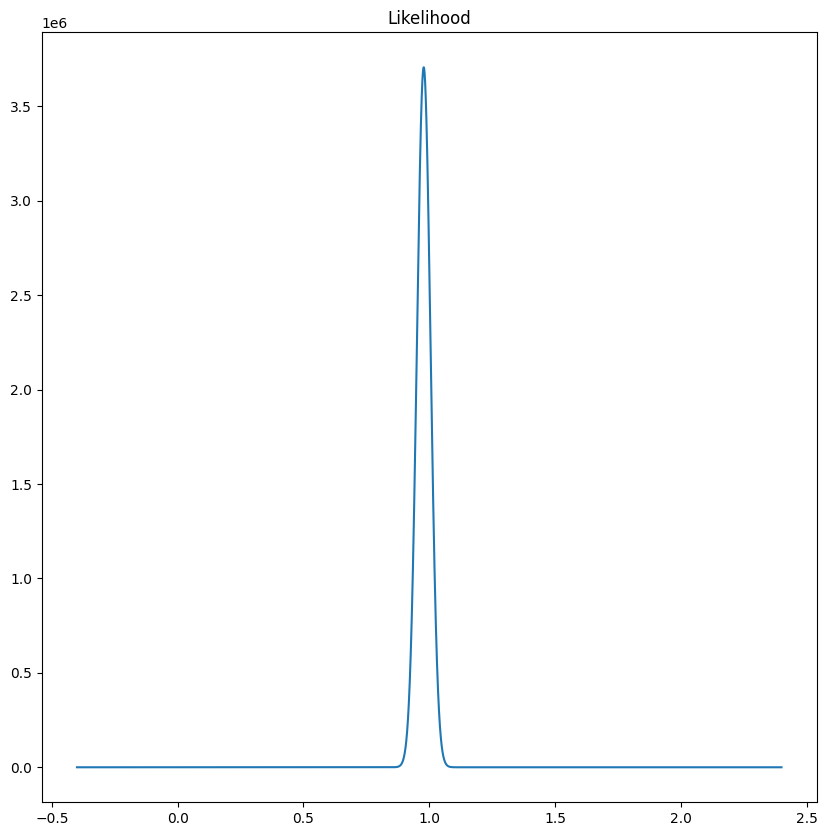

In [323]:
# Create and build the likelihhod of the dataset
likelihood = np.array([1 for i in range(nbins)])
for i in range(len(true_dist_estimations)):
    likelihood = np.multiply(likelihood, true_dist_estimations[i])

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Likelihood")

ax.plot(x_grid, likelihood)

# Estimate the mean taking its estimator and the maximum of the likelihood
mu_est = np.sum(observations / sigmas ** 2) / np.sum(sigmas ** -2)

likelihood_max_index = np.argsort(likelihood)[-1] # Last element of sorted indexes
likelihood_max = x_grid[likelihood_max_index]

print("Mean: " + str(mu_est))
print("Likelihhod maximum: " + str(likelihood_max))

In [324]:
log_likelihood = np.log(likelihood)

# Estimate the mean error taking its estimator and the Fisher matrix
sigma_est = np.sum(sigmas ** -2) ** (-1 / 2)

dx_grid = (right_lim - left_lim) / nbins # Constant increment in x
fisher_sigma = (-1 * np.diff(log_likelihood, 2) / (dx_grid ** 2)) ** (-1 / 2)

print("Mean error: " + str(sigma_est))
print("Fisher matrix error: " + str(fisher_sigma[likelihood_max_index]))

Mean error: 0.027045241232469708
Fisher matrix error: 0.02704253670880294


/var/folders/05/2fbv44555hx420qclxnfbd4c0000gn/T/ipykernel_93239/2568215577.py:1: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(likelihood)
/var/folders/05/2fbv44555hx420qclxnfbd4c0000gn/T/ipykernel_93239/2568215577.py:7: RuntimeWarning: divide by zero encountered in power
  fisher_sigma = (-1 * np.diff(log_likelihood, 2) / (dx_grid ** 2)) ** (-1 / 2)
/var/folders/05/2fbv44555hx420qclxnfbd4c0000gn/T/ipykernel_93239/2568215577.py:7: RuntimeWarning: invalid value encountered in power
  fisher_sigma = (-1 * np.diff(log_likelihood, 2) / (dx_grid ** 2)) ** (-1 / 2)


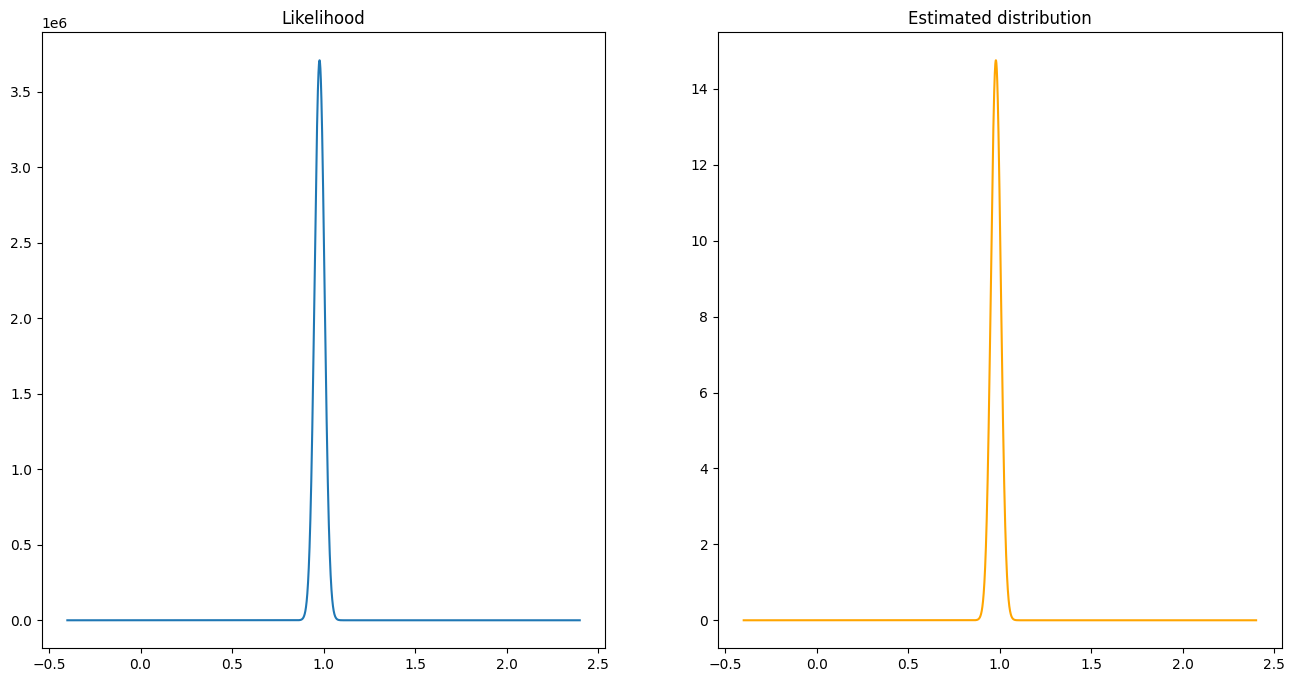

In [325]:
# Plot of the likelihood and the estimated distribution
estimated_distribution = stats.norm.pdf(x_grid, likelihood_max, fisher_sigma[likelihood_max_index])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].set_title("Likelihood")
ax[0].plot(x_grid, likelihood)

ax[1].set_title("Estimated distribution")
ax[1].plot(x_grid, estimated_distribution, color='orange')